# 1.1_ss_chap6_overfit_weight_decay

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from src import utils
import itertools
import logging
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.patches as patches
from collections import OrderedDict
%matplotlib inline

In [4]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

In [8]:
from src.ch06.overfit_weight_decay import main
from src.dataset.mnist import load_mnist
from src.common.multi_layer_net import MultiLayerNet
from src.common.optimizer import SGD

## From overfit_weight_decay

epoch:0, train acc:0.12, test acc:0.1204
epoch:1, train acc:0.12666666666666668, test acc:0.1311
epoch:2, train acc:0.14, test acc:0.1378
epoch:3, train acc:0.16333333333333333, test acc:0.1328
epoch:4, train acc:0.14666666666666667, test acc:0.1339
epoch:5, train acc:0.17666666666666667, test acc:0.1419
epoch:6, train acc:0.19666666666666666, test acc:0.1489
epoch:7, train acc:0.18666666666666668, test acc:0.1558
epoch:8, train acc:0.18333333333333332, test acc:0.1491
epoch:9, train acc:0.18666666666666668, test acc:0.1449
epoch:10, train acc:0.21, test acc:0.1537
epoch:11, train acc:0.21666666666666667, test acc:0.1539
epoch:12, train acc:0.24, test acc:0.1637
epoch:13, train acc:0.23, test acc:0.1596
epoch:14, train acc:0.25666666666666665, test acc:0.1828
epoch:15, train acc:0.25333333333333335, test acc:0.181
epoch:16, train acc:0.35, test acc:0.2358
epoch:17, train acc:0.38, test acc:0.2557
epoch:18, train acc:0.4, test acc:0.2675
epoch:19, train acc:0.43, test acc:0.279
epoch:20

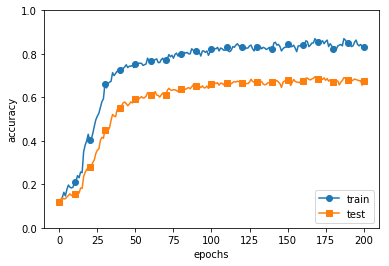

In [7]:
main()

## Write

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

In [30]:
weight_decay_lambda = 0.0
# weight_decay_lambda = 0.1

In [31]:
network = MultiLayerNet(input_size=784,
                       hidden_size_list=[100, 100, 100, 100, 100, 100],
                       output_size=10,
                       weight_decay_lambda=weight_decay_lambda)

In [32]:
optimizer = SGD(lr=0.01)

In [33]:
max_epochs=201
train_size=x_train.shape[0]
batch_size = 100

In [34]:
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

In [35]:
iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt = 0

In [36]:
i = 0
while epoch_cnt < max_epochs:
        i += 1
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grads)
        
        if i % iter_per_epoch == 0:
                train_acc = network.accuracy(x_train, t_train)
                test_acc = network.accuracy(x_test, t_test)

                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)

                logger.info(f"epoch: {epoch_cnt}")
                logger.info(f"train_acc: {train_acc}")
                logger.info(f"test_acc: {test_acc}")

                epoch_cnt += 1

2018-11-23 15:20:19,366 - root - INFO - epoch: 0
2018-11-23 15:20:19,367 - root - INFO - train_acc: 0.09666666666666666
2018-11-23 15:20:19,368 - root - INFO - test_acc: 0.0874
2018-11-23 15:20:19,565 - root - INFO - epoch: 1
2018-11-23 15:20:19,566 - root - INFO - train_acc: 0.10333333333333333
2018-11-23 15:20:19,566 - root - INFO - test_acc: 0.0948
2018-11-23 15:20:19,755 - root - INFO - epoch: 2
2018-11-23 15:20:19,755 - root - INFO - train_acc: 0.13
2018-11-23 15:20:19,756 - root - INFO - test_acc: 0.1071
2018-11-23 15:20:20,002 - root - INFO - epoch: 3
2018-11-23 15:20:20,003 - root - INFO - train_acc: 0.16666666666666666
2018-11-23 15:20:20,003 - root - INFO - test_acc: 0.1219
2018-11-23 15:20:20,186 - root - INFO - epoch: 4
2018-11-23 15:20:20,187 - root - INFO - train_acc: 0.19
2018-11-23 15:20:20,188 - root - INFO - test_acc: 0.1404
2018-11-23 15:20:20,374 - root - INFO - epoch: 5
2018-11-23 15:20:20,375 - root - INFO - train_acc: 0.23
2018-11-23 15:20:20,376 - root - INFO - 

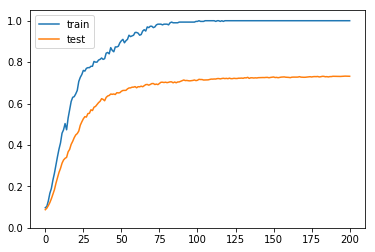

In [38]:
x = range(len(train_acc_list)) 
plt.plot(x, train_acc_list, label='train')
plt.plot(x, test_acc_list, label='test')
plt.ylim(0, 1.05)
plt.legend()